<a href="https://colab.research.google.com/github/eortegaa1500/vaquerosnasaspaceapps2023/blob/main/Sonidification_LosVaqueros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Program to convert an image to sound focused on people with visual impairment or auditory experiences of the environment.

### Libraries for audio and image processing
---



In [ ]:
!pip install MIDIUtil

In [ ]:
!pip install pedalboard

In [ ]:
#Importing modules
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import IPython.display as ipd
import librosa
from midiutil import MIDIFile
import random
from pedalboard import Pedalboard, Chorus, Reverb
from pedalboard.io import AudioFile

#### Enter image of landscape (image) of interest

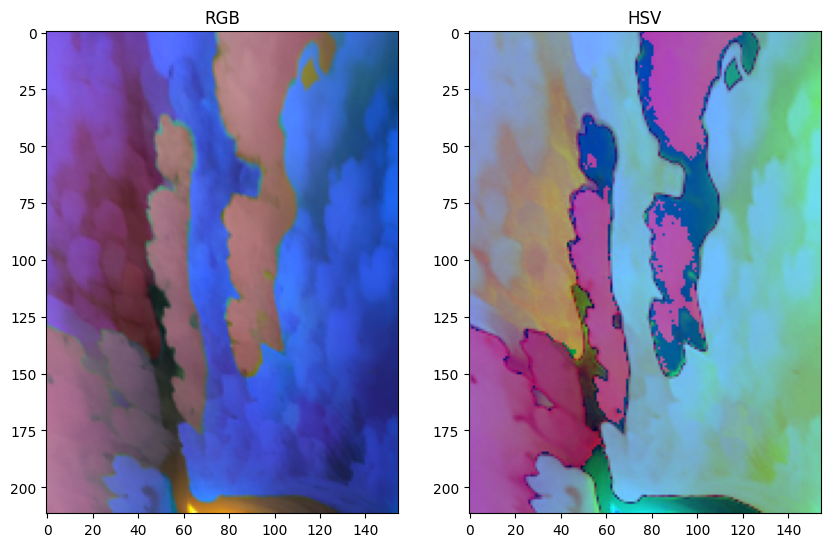

In [ ]:
img1=cv2.imread('Arboles.PNG')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

dimensions = img.shape
Alto = img.shape[0]
Ancho = img.shape[1]
Val = img.shape[2]

dpi = plt.rcParams['figure.dpi']
Tam_fig = Ancho / float(dpi), Alto / float(dpi)

hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
#Plot the image
fig, axs = plt.subplots(1, 2, figsize = (10,10))
names = ['RGB','HSV']
imgs  = [img, hsv]
i = 0
for elem in imgs:
    axs[i].title.set_text(names[i])
    axs[i].imshow(elem)
    axs[i].grid(False)
    i += 1
plt.show()

#### Converting the values of an image (matrix) to a vector


In [ ]:
i=0 ; j=0
hues = []
for i in range(Alto):
    for j in range(Ancho):
        hue = hsv[i][j][0]
        hues.append(hue)

In [ ]:

pixels_df = pd.DataFrame(hues, columns=['hues'])
pixels_df

,hues
0,128
1,128
2,128
3,128
4,128
...,...
32855,111
32856,111
32857,109
32858,109


#### Convert musical note values to frequencies, pentatonic scale A minor. Frequency association to pixel values

In [ ]:
#Define frequencies that make up A-Harmonic Minor Scale sol LA DO RE MI SOL
scale_freqs = [195.98, 220.00, 261.626 ,293.665, 329.628, 391.995, 440.00, 523.251, 587.330, 659.255, 783.991, 880, 1046.5, 1174.66, 1318.51, 1567.98, 1770.0, 2093.0, 2349.32, 2637.02, 3135.96, 3520, 4186,4698.64]
def hue2freq(h,scale_freqs):
    thresholds = [7.5, 15, 22.5, 30, 37.5, 45, 52.5, 60, 67.5, 75, 82.5, 90, 97.5, 105, 112.5, 120, 127.5, 135, 142.5, 150, 157.5, 165, 172.5, 180]
    note = scale_freqs[0]
    if (h <= thresholds[0]):
         note = scale_freqs[0]
    elif (h > thresholds[0]) & (h <= thresholds[1]):
        note = scale_freqs[1]
    elif (h > thresholds[1]) & (h <= thresholds[2]):
        note = scale_freqs[2]
    elif (h > thresholds[2]) & (h <= thresholds[3]):
        note = scale_freqs[3]
    elif (h > thresholds[3]) & (h <= thresholds[4]):
        note = scale_freqs[4]
    elif (h > thresholds[4]) & (h <= thresholds[5]):
        note = scale_freqs[5]
    elif (h > thresholds[5]) & (h <= thresholds[6]):
        note = scale_freqs[6]
    elif (h > thresholds[6]) & (h <= thresholds[7]):
        note = scale_freqs[7]
    elif (h > thresholds[7]) & (h <= thresholds[8]):
        note = scale_freqs[8]
    elif (h > thresholds[8]) & (h <= thresholds[9]):
        note = scale_freqs[9]
    elif (h > thresholds[9]) & (h <= thresholds[10]):
        note = scale_freqs[10]
    elif (h > thresholds[10]) & (h <= thresholds[11]):
        note = scale_freqs[11]
    elif (h > thresholds[11]) & (h <= thresholds[12]):
        note = scale_freqs[12]
    elif (h > thresholds[12]) & (h <= thresholds[13]):
        note = scale_freqs[13]
    elif (h > thresholds[13]) & (h <= thresholds[14]):
        note = scale_freqs[14]
    elif (h > thresholds[14]) & (h <= thresholds[15]):
        note = scale_freqs[15]
    elif (h > thresholds[15]) & (h <= thresholds[16]):
        note = scale_freqs[16]
    elif (h > thresholds[16]) & (h <= thresholds[17]):
        note = scale_freqs[17]
    elif (h > thresholds[17]) & (h <= thresholds[18]):
        note = scale_freqs[18]
    elif (h > thresholds[18]) & (h <= thresholds[19]):
        note = scale_freqs[19]
    elif (h > thresholds[19]) & (h <= thresholds[20]):
        note = scale_freqs[20]
    elif (h > thresholds[20]) & (h <= thresholds[21]):
        note = scale_freqs[21]
    elif (h > thresholds[21]) & (h <= thresholds[22]):
        note = scale_freqs[22]
    elif (h > thresholds[22]) & (h <= thresholds[23]):
        note = scale_freqs[23]
    elif (h > thresholds[23]) & (h <= thresholds[24]):
        note = scale_freqs[24]
    else:
        note = scale_freqs[0]

    return note

In [ ]:
pixels_df['notes'] = pixels_df.apply(lambda row : hue2freq(row['hues'],scale_freqs), axis = 1)
frequencies = pixels_df['notes'].to_numpy()

#### Audio generation, sine wave

In [ ]:
song = np.array([])
sr = 22050
T = 0.1
octaves = np.array([0.5,1,2])
t = np.linspace(0, T, int(T*sr), endpoint=False)
nPixels = 100
for i in range(nPixels):
    octave = random.choice(octaves)
    val =  octave * frequencies[i]
    note  = 0.5*np.sin(2*np.pi*val*t)
    song  = np.concatenate([song, note])
ipd.Audio(song, rate=sr)

In [ ]:
!pip install numpy scipy

#### Save audio in mp3 format

In [ ]:
import numpy as np
from scipy.io import wavfile
output_Au = "Arboles.mp3"

song = np.int16(song * 32767)

wavfile.write(output_Au, sr, song)

The audio generation process for each landscape is repeated for each image, the audio is saved and used in the HTML file of the JavaScript program, to associate the audio to a certain region (based on the landscape).